<strong> Importing libaries and reading Data Frame

In [398]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [399]:
df = pd.read_csv('data/instagram.csv')
df.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803


In [400]:
df.shape

(1000, 11)

<strong> Looking for nulls cells

In [401]:
df.isnull().sum()

Country                  0
Rank                     0
Account                  0
Title                   17
Link                     0
Category                91
Followers                0
Audience Country         7
Authentic engagement     0
Engagement avg           0
Scraped                  0
dtype: int64

In [402]:
df.Category.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Category, Length: 1000, dtype: bool

<strong> Creating a list with the index of null categories

In [403]:
index_drop = []
count = 0
for category in df.Category.isna():
    if category == True:
        index_drop.append(count)
    count += 1

Droping rows with null categories

In [404]:
df.drop(index_drop, inplace = True)

In [405]:
df.shape

(909, 11)

In [406]:
df['Index'] = list(range(len(df)))

In [407]:
df.set_index('Index', inplace = True)
df.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
Index,,,,,,,,,,,
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803


<strong> Adding unique categories into a list

In [408]:
categories = []
for category in df.Category:
        for i in category.split('|'):
            if i not in categories:
                categories.append(i)

<strong> Looking for D|I|Y in df.Category and changing to DIY

In [409]:
delete = []
for row in df.Category:
    if row not in delete:
        print(row)
        delete.append(row)

Sports with a ball
Fashion|Modeling|Beauty
Sports with a ball|Family
Modeling|Fashion
Music|Lifestyle
Cinema|Actors/actresses|Fashion
Fashion|Beauty
Music|Fashion
Music
Cinema|Actors/actresses
Clothing|Outfits|Lifestyle
Music|Beauty
Cinema|Actors/actresses|Fitness|Gym
Photography
Lifestyle
Beauty
Music|Cinema|Actors/actresses
Modeling|Lifestyle
Finance|Economics|Business|Careers
Lifestyle|Shows
Lifestyle|Fashion|Clothing|Outfits
Art|Artists
Beauty|Art|Artists|Cinema|Actors/actresses
Cinema|Actors/actresses|Modeling
Humor|Fun|Happiness
Lifestyle|Modeling
Cinema|Actors/actresses|Modeling|Lifestyle
Family|Sports with a ball
Fitness|Gym|Lifestyle
Science|Photography
Modeling
Cinema|Actors/actresses|Art|Artists
Music|Modeling
Literature|Journalism|Cinema|Actors/actresses|Fashion
Fitness|Gym|Shopping|Retail|Clothing|Outfits
Shows|Lifestyle
Modeling|Family
Cinema|Actors/actresses|Music|Shows
Humor|Fun|Happiness|Clothing|Outfits
Computers|Gadgets
Shows|Humor|Fun|Happiness
Sports with a ball|Li

In [410]:
count = 0
index_ = []
index = 0
for row in df.Category:
    if 'D|I|Y' in row:
        count += 1
        index_.append(index)
    index += 1
print(f'O número de valores com D|I|Y é: {count}'
      f'\n Index(s): {index_}')

O número de valores com D|I|Y é: 1
 Index(s): [783]


In [411]:
df.Category[783] = df.Category[783].replace('Family|D|I|Y|Design', 'Family|DIY|Design')

C:\Users\Micro\AppData\Local\Temp/ipykernel_15488/1051452030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Category[783] = df.Category[783].replace('Family|D|I|Y|Design', 'Family|DIY|Design')


In [412]:
df.Category[783]

'Family|DIY|Design'

<strong> Adding unique categories into a list after changes

In [413]:
categories = []
for category in df.Category:
        for i in category.split('|'):
            if i not in categories:
                categories.append(i)

In [414]:
categories[-4]

'DIY'

<strong> Creating a v2 from my df with the categories as colunms

In [415]:
df_v2 = pd.DataFrame(columns = categories)
df_v2['Engagement'] = 'Authentic engagement', 'Engagement avg'
df_v2.set_index('Engagement', inplace = True)
df_v2.head()

,Sports with a ball,Fashion,Modeling,Beauty,Family,Music,Lifestyle,Cinema,Actors/actresses,Clothing,...,Travel,Animals,Accessories,Jewellery,Trainers,Coaches,DIY,Design,Extreme,Outdoor activity
Engagement,,,,,,,,,,,,,,,,,,,,,
Authentic engagement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engagement avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filling NaN datas with float 0.0

In [416]:
df_v2.fillna(0.0, inplace = True)
df_v2 = df_v2.astype('float64')

<strong> Summing Authentic engagement and Engagement avg from df into df_v2 columns

In [417]:
count = [0]
for category in df.Category:
    for column in df_v2:
        if column in category.split('|'):
            df_v2[column][0] += df['Authentic engagement'][count]
            df_v2[column][1] += df['Engagement avg'][count]

<strong> creating a v3 from df_v2 but with categories as index

In [418]:
df_v3 = df_v2.T
df_v3.rename_axis('index', axis='columns', inplace = True)
df_v3.reset_index(level=0, inplace = True)
df_v3.rename(columns = {'index':'Category'}, inplace = True)
df_v3.sort_values(by=['Authentic engagement'], inplace = True, ascending = False)
df_v3.head()

index,Category,Authentic engagement,Engagement avg
7,Cinema,2.137200e+09,2.603000e+09
8,Actors/actresses,2.137200e+09,2.603000e+09
5,Music,2.035800e+09,2.479500e+09
6,Lifestyle,1.232400e+09,1.501000e+09
0,Sports with a ball,9.126000e+08,1.111500e+09


<strong> Looking unique categories to decrease number of variables

In [419]:
df['Category'].unique()

array(['Sports with a ball', 'Fashion|Modeling|Beauty',
       'Sports with a ball|Family', 'Modeling|Fashion', 'Music|Lifestyle',
       'Cinema|Actors/actresses|Fashion', 'Fashion|Beauty',
       'Music|Fashion', 'Music', 'Cinema|Actors/actresses',
       'Clothing|Outfits|Lifestyle', 'Music|Beauty',
       'Cinema|Actors/actresses|Fitness|Gym', 'Photography', 'Lifestyle',
       'Beauty', 'Music|Cinema|Actors/actresses', 'Modeling|Lifestyle',
       'Finance|Economics|Business|Careers', 'Lifestyle|Shows',
       'Lifestyle|Fashion|Clothing|Outfits', 'Art|Artists',
       'Beauty|Art|Artists|Cinema|Actors/actresses',
       'Cinema|Actors/actresses|Modeling', 'Humor|Fun|Happiness',
       'Lifestyle|Modeling', 'Cinema|Actors/actresses|Modeling|Lifestyle',
       'Family|Sports with a ball', 'Fitness|Gym|Lifestyle',
       'Science|Photography', 'Modeling',
       'Cinema|Actors/actresses|Art|Artists', 'Music|Modeling',
       'Literature|Journalism|Cinema|Actors/actresses|Fashion',
 

In [420]:
df_v3.Category

7                 Cinema
8       Actors/actresses
5                  Music
6              Lifestyle
0     Sports with a ball
2               Modeling
18                 Shows
3                 Beauty
1                Fashion
23             Happiness
21                 Humor
20               Artists
19                   Art
22                   Fun
4                 Family
12                   Gym
11               Fitness
10               Outfits
9               Clothing
13           Photography
29             Computers
30               Gadgets
40         Adult content
32                Sports
16              Business
17               Careers
31                Racing
43                  Cars
44            Motorbikes
26            Journalism
25            Literature
15             Economics
38             Machinery
39          Technologies
14               Finance
42                Luxury
35    Nature  landscapes
46                  Toys
24               Science
41      Comics  sketches


In [421]:
def rename_df_v3(index_old_name1, index_old_name2):
    print(f'Renaming {df_v3.Category[index_old_name1]} to [{df_v3.Category[index_old_name1]} & {df_v3.Category[index_old_name2]}] and deleting category {df_v3.Category[index_old_name2]}')
    df_v3.Category[index_old_name1] = str(df_v3.Category[index_old_name1])+' & '+str(df_v3.Category[index_old_name2])
    df_v3.drop([index_old_name2], inplace = True)
    return

def loop_rename_df_v3(list_indexes): # For this loop if you want to join together 2 categories input in list the high value
    while list_indexes != []:        # example: if you want join togetehr 43 and 44 insert into the list only 44
        rename_df_v3(list_indexes[-1], (list_indexes[-1] - 1))
        list_indexes.pop()
    return

In [422]:
indexes = [8, 20, 10, 23, 22, 12, 44, 17, 26, 54, 52, 37, 39, 15]
# cinema actors; artist art; clothing outfits; cooking food; humor fun happiness; fitness gym; journalism literature
# DIY design; trainers coaches; management marketing; technologies and machinery, economics and finances
loop_rename_df_v3(indexes)

Renaming Economics to [Economics & Finance] and deleting category Finance
Renaming Technologies to [Technologies & Machinery] and deleting category Machinery
Renaming Marketing to [Marketing & Management] and deleting category Management
Renaming Coaches to [Coaches & Trainers] and deleting category Trainers
Renaming Design to [Design & DIY] and deleting category DIY
Renaming Journalism to [Journalism & Literature] and deleting category Literature
Renaming Careers to [Careers & Business] and deleting category Business
Renaming Motorbikes to [Motorbikes & Cars] and deleting category Cars
Renaming Gym to [Gym & Fitness] and deleting category Fitness
Renaming Fun to [Fun & Humor] and deleting category Humor
Renaming Happiness to [Happiness & Fun & Humor] and deleting category Fun & Humor
Renaming Outfits to [Outfits & Clothing] and deleting category Clothing
Renaming Artists to [Artists & Art] and deleting category Art
Renaming Actors/actresses to [Actors/actresses & Cinema] and deleting 

C:\Users\Micro\AppData\Local\Temp/ipykernel_15488/2480044299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v3.Category[index_old_name1] = str(df_v3.Category[index_old_name1])+' & '+str(df_v3.Category[index_old_name2])


# Plotting Graphs

In [423]:
import seaborn as sns
from matplotlib import pyplot as plt

In [424]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

<AxesSubplot:xlabel='Authentic engagement', ylabel='Category'>

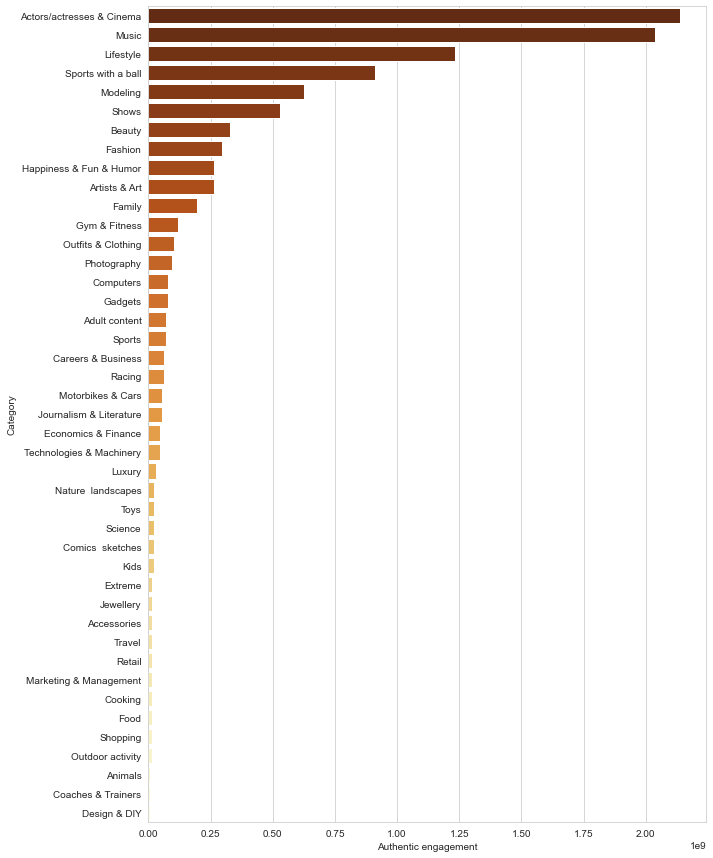

In [425]:
plt.figure(figsize = (10,15))
y = np.arange(len(df_v3))
sns.barplot(x = 'Authentic engagement', y = 'Category', data = df_v3, palette = colors_from_values(y,'YlOrBr_r'))

<AxesSubplot:xlabel='Engagement avg', ylabel='Category'>

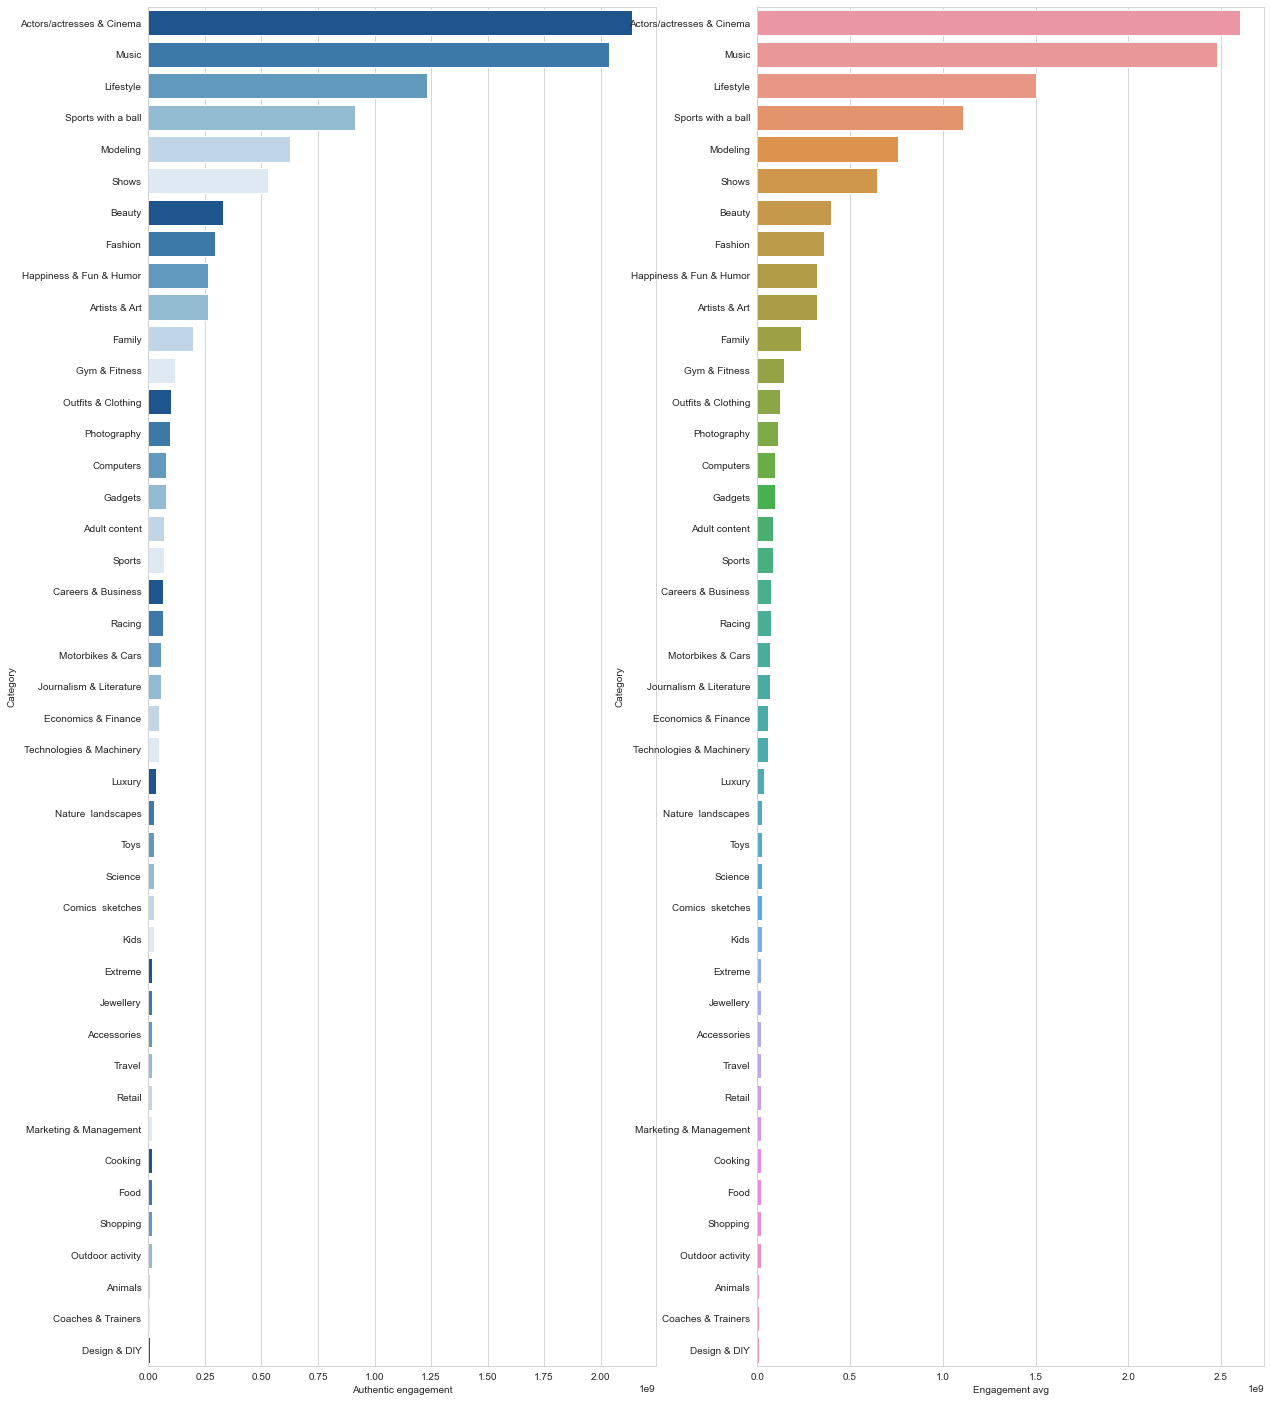

In [433]:
plt.figure(figsize = (20,25))
ax = plt.subplot(1,2,1)
sns.barplot(x = 'Authentic engagement', y = 'Category', data = df_v3, palette = color)
plt.subplot(1,2,2)
sns.barplot(x = 'Engagement avg', y = 'Category', data = df_v3)